# Optimizers
Motherf*cker, did you optimize it?

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datasets.dataset import WineDataset
from tensor import *
from modules import *
from activations import *
from losses import *
import optimizers
from optimizers import *
from datasets import *
%matplotlib inline

## Foreword
As discussed in the previous notebook, there was implemented a small framework with auto gradient (only limited computations are supported) and a small infrastructure around it. The implementation was inspired by the PyTorch framework, so all the modules are similar to the ones in PyTorch. 

The framework is not complete, but it is enough to implement a simple neural network and train it on a simple dataset. The framework is not optimized for speed, but for simplicity and readability. 

The framework is not tested, so there might be some bugs. The framework is not optimized for memory, so it might not be able to train a big neural network. The framework is not optimized for GPU, so it might not be able to train a big neural network. 

The framework is not optimized for distributed computing, so it might not be able to train a big neural network. 

The framework is not optimized for anything, so it might not be able to train a big neural network. 
**Remember, it is just a toy framework for learning purposes.**

## Introduction
The objective of this notebook is to present of how neural networks are trained. 
The basis idea behind the NN training is optimization. 

The NN is a function that maps the input to the output. The NN is a function that has some parameters. The parameters are the weights of the NN. The weights are the parameters that are somehow represent data features in the particular way. 
To measure the success of the NN, there is a loss function. 

## Loss function
The loss function is a function that measures the difference between the predicted output and the true output. The loss function is a function that depends on the weights of the NN. The loss function is a function that depends on the data. The loss function is a function that depends on the data features. The loss function is a function that depends on the data features and the weights of the NN. The loss function is a function that depends on the data features and the weights of the NN and the true output.

There are some loss functions that are used in practice. The most popular ones are:

### Mean Absolute Error (MAE)
**Formula:**

$$ MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i| $$

**When it is used:**
MAE is commonly used as a regression loss function to measure the average absolute difference between the actual and predicted values.

**Advantages and Disadvantages:**
- *Advantages:* 
  - Easy to understand and interpret.
  - Less sensitive to outliers compared to Mean Squared Error (MSE).

- *Disadvantages:*
  - Not differentiable at \(y_i = \hat{y}_i\), which can be a challenge for some optimization algorithms.
  - Treats all errors equally, regardless of the magnitude.

---

### Mean Squared Error (MSE)
**Formula:**
$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

**When it is used:**
MSE is commonly used as a regression loss function to measure the average squared difference between the actual and predicted values.

**Advantages and Disadvantages:**
- *Advantages:*
  - Differentiable, making it suitable for optimization algorithms.
  - Emphasizes larger errors due to the squared term.

- *Disadvantages:*
  - Sensitive to outliers because of the squared term.
  - Units of the error are squared, which may not always be intuitive.

---

### Binary Cross Entropy
**Formula:**
$$ BCE(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n}[y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)] $$

**When it is used:**
Binary Cross Entropy is commonly used as a loss function for binary classification problems when the output is a probability.

**Advantages and Disadvantages:**
- *Advantages:*
  - Well-suited for problems involving probability estimates.
  - Encourages the model to be confident in its predictions.

- *Disadvantages:*
  - Can be sensitive to imbalanced datasets.
  - May suffer from vanishing gradients when predicted probabilities are close to the true labels.

---

### Cross-Entropy
**Formula:**
$$ CE(y, \hat{y}) = -\frac{1}{n}\sum_{i=1}^{n}\sum_{j=1}^{C}y_{ij} \log(\hat{y}_{ij}) $$

**When it is used:**
Cross-Entropy is commonly used as a loss function for multi-class classification problems when the output is a probability distribution over multiple classes.

**Advantages and Disadvantages:**
- *Advantages:*
  - Generalizes well to multi-class problems.
  - Encourages the model to assign high probabilities to the correct class.

- *Disadvantages:*
  - Can be computationally expensive for a large number of classes.
  - Sensitive to class imbalance.

---

### KL Divergence Loss
**Formula:**
$$ KL(y||\hat{y}) = \sum_{i=1}^{n} y_i \log\left(\frac{y_i}{\hat{y}_i}\right) $$

**When it is used:**
KL Divergence is used in various applications, including probabilistic models, to measure the difference between two probability distributions.

**Advantages and Disadvantages:**
- *Advantages:*
  - Measures the information lost when one distribution is used to approximate another.
  - Encourages the model to learn a distribution similar to the true distribution.

- *Disadvantages:*
  - Not symmetric, meaning \(KL(y||\hat{y})\) is not the same as \(KL(\hat{y}||y)\).
  - May suffer from numerical instability when probabilities are close to zero.

## Optimizers
The objective of the optimizer is to find the weights of the NN that minimize the loss function. The optimizer is a function that depends on the loss function. The optimizer is a function that depends on the weights of the NN. The optimizer is a function that depends on the data. The optimizer is a function that depends on the data features. The optimizer is a function that depends on the data features and the weights of the NN. The optimizer is a function that depends on the data features and the weights of the NN and the true output.

There are some optimizers that are used in practice. The most popular ones are:

### Stochastic Gradient Descent (SGD)
**Formula:**
$$ \theta_{t+1} = \theta_t - \eta \nabla J(\theta_t) $$

**When it is used:**
SGD is a widely used optimization algorithm for training machine learning models. It is often employed in deep learning for updating the model parameters to minimize the loss function.

**Advantages and Disadvantages:**
- *Advantages:*
  - Computationally less expensive compared to some more sophisticated optimizers.
  - Can work well with large-scale datasets.

- *Disadvantages:*
  - Prone to getting stuck in local minima.
  - Noisy updates can lead to oscillations during training.

---

### Adam (Adaptive Moment Estimation)
**Formula:**
$$ m_t = \beta_1 m_{t-1} + (1-\beta_1)g_t $$
$$ v_t = \beta_2 v_{t-1} + (1-\beta_2)g_t^2 $$
$$ \hat{m}_t = \frac{m_t}{1 - \beta_1^t} $$
$$ \hat{v}_t = \frac{v_t}{1 - \beta_2^t} $$
$$ \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon}\hat{m}_t $$

**When it is used:**
Adam is an adaptive learning rate optimization algorithm suitable for a wide range of machine learning tasks, including deep learning.

**Advantages and Disadvantages:**
- *Advantages:*
  - Adaptive learning rates for individual parameters.
  - Efficient memory usage.
  - Effective for sparse gradients.

- *Disadvantages:*
  - Sensitive to hyperparameter choices.
  - May exhibit erratic behavior on some non-convex optimization problems.

---

### Adagrad (Adaptive Gradient Algorithm)
**Formula:**
$$ G_{t} = G_{t-1} + g_{t}^2 $$
$$ \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_{t} + \epsilon}} g_t $$

**When it is used:**
Adagrad is an adaptive learning rate optimization algorithm designed to perform well on sparse data.

**Advantages and Disadvantages:**
- *Advantages:*
  - Automatically adapts the learning rates for different parameters.
  - Well-suited for problems with sparse gradients.

- *Disadvantages:*
  - Accumulates the squared gradients, leading to a diminishing learning rate over time.
  - May become too conservative in later stages of training.

---

### RMSprop (Root Mean Square Propagation)
**Formula:**
$$ E[g^2]_t = \beta E[g^2]_{t-1} + (1-\beta)g_t^2 $$
$$ \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t $$

**When it is used:**
RMSprop is an adaptive learning rate optimization algorithm that addresses the diminishing learning rate issue of Adagrad.

**Advantages and Disadvantages:**
- *Advantages:*
  - Mitigates the diminishing learning rate problem of Adagrad.
  - Effective for non-stationary objectives.

- *Disadvantages:*
  - Requires manual tuning of hyperparameters.
  - May still suffer from vanishing or exploding gradients in some cases.

## Dataset and Model
For this task was used Wine dataset and a simple NN with 3 hidden layers. 

In [2]:
class WiNET(Module):
    def __init__(self, in_features, out_features, hidden_features=None):
        super().__init__()
        if hidden_features is None:
            hidden_features = out_features
        self.linear1 = Linear(in_features, hidden_features)
        self.linear2 = Linear(hidden_features, hidden_features)
        self.linear3 = Linear(hidden_features, out_features)
        self.activation = ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x

In [3]:
wine_df = pd.read_csv('../data/wine/winequality-red.csv')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Y = wine_df['quality']
X = wine_df.drop('quality', axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1, 1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
train_ds = WineDataset((X_train, Y_train))
test_ds = WineDataset((X_test, Y_test))
train_dl = DataLoader(train_ds, shuffle=True)
test_dl = DataLoader(test_ds, shuffle=True)

In [4]:
INPUT_FEATURES = X.shape[1]
OUTPUT_FEATURES = 1
HIDDEN_FEATURES = 4

For this task was used MSE loss function as it is a regression problem.

In [5]:
from utils import setup_logger
import os

logger = setup_logger("train_logger", "train.log")
optimizers_list = ["SGD", "Adam", "Adagrad", "RMSProp"]
stats_per_optimizer = {}
for optimizer in optimizers_list:
    stats_per_optimizer[optimizer] = {
        "losses": {
            "train": [],
            "validation": []
        },
        "accuracies": {
            "train": [],
            "validation": []
        }
    }
epochs = 20
save_state_frequency = 0
min_save_epoch = 0
weights_dir = "../weights/wine"

if not os.path.exists(weights_dir):
    os.makedirs(weights_dir)
model = WiNET(INPUT_FEATURES, OUTPUT_FEATURES, HIDDEN_FEATURES)
loss_fn = MSE()

In [6]:
from core import train
from core.evaluations import *

In [7]:
for optimizer_name, stats in stats_per_optimizer.items():
    print(f"Optimizer: {optimizer_name}")
    optimizer = getattr(optimizers, optimizer_name)(model, lr=1e-5)
    train(model=model, optimizer=optimizer, loss_fn=loss_fn,
          dataloaders=(train_dl, test_dl), metric_fn=mse, epochs=epochs,
          stats=stats, logger=logger, weights_dir=weights_dir,
          save_state_frequency=save_state_frequency,
          min_save_epoch=min_save_epoch)


Optimizer: SGD


100%|██████████| 20/20 [00:04<00:00,  4.32it/s]


Optimizer: Adam


100%|██████████| 20/20 [00:05<00:00,  3.42it/s]


Optimizer: Adagrad


100%|██████████| 20/20 [00:05<00:00,  3.98it/s]


Optimizer: RMSProp


100%|██████████| 20/20 [00:05<00:00,  3.81it/s]


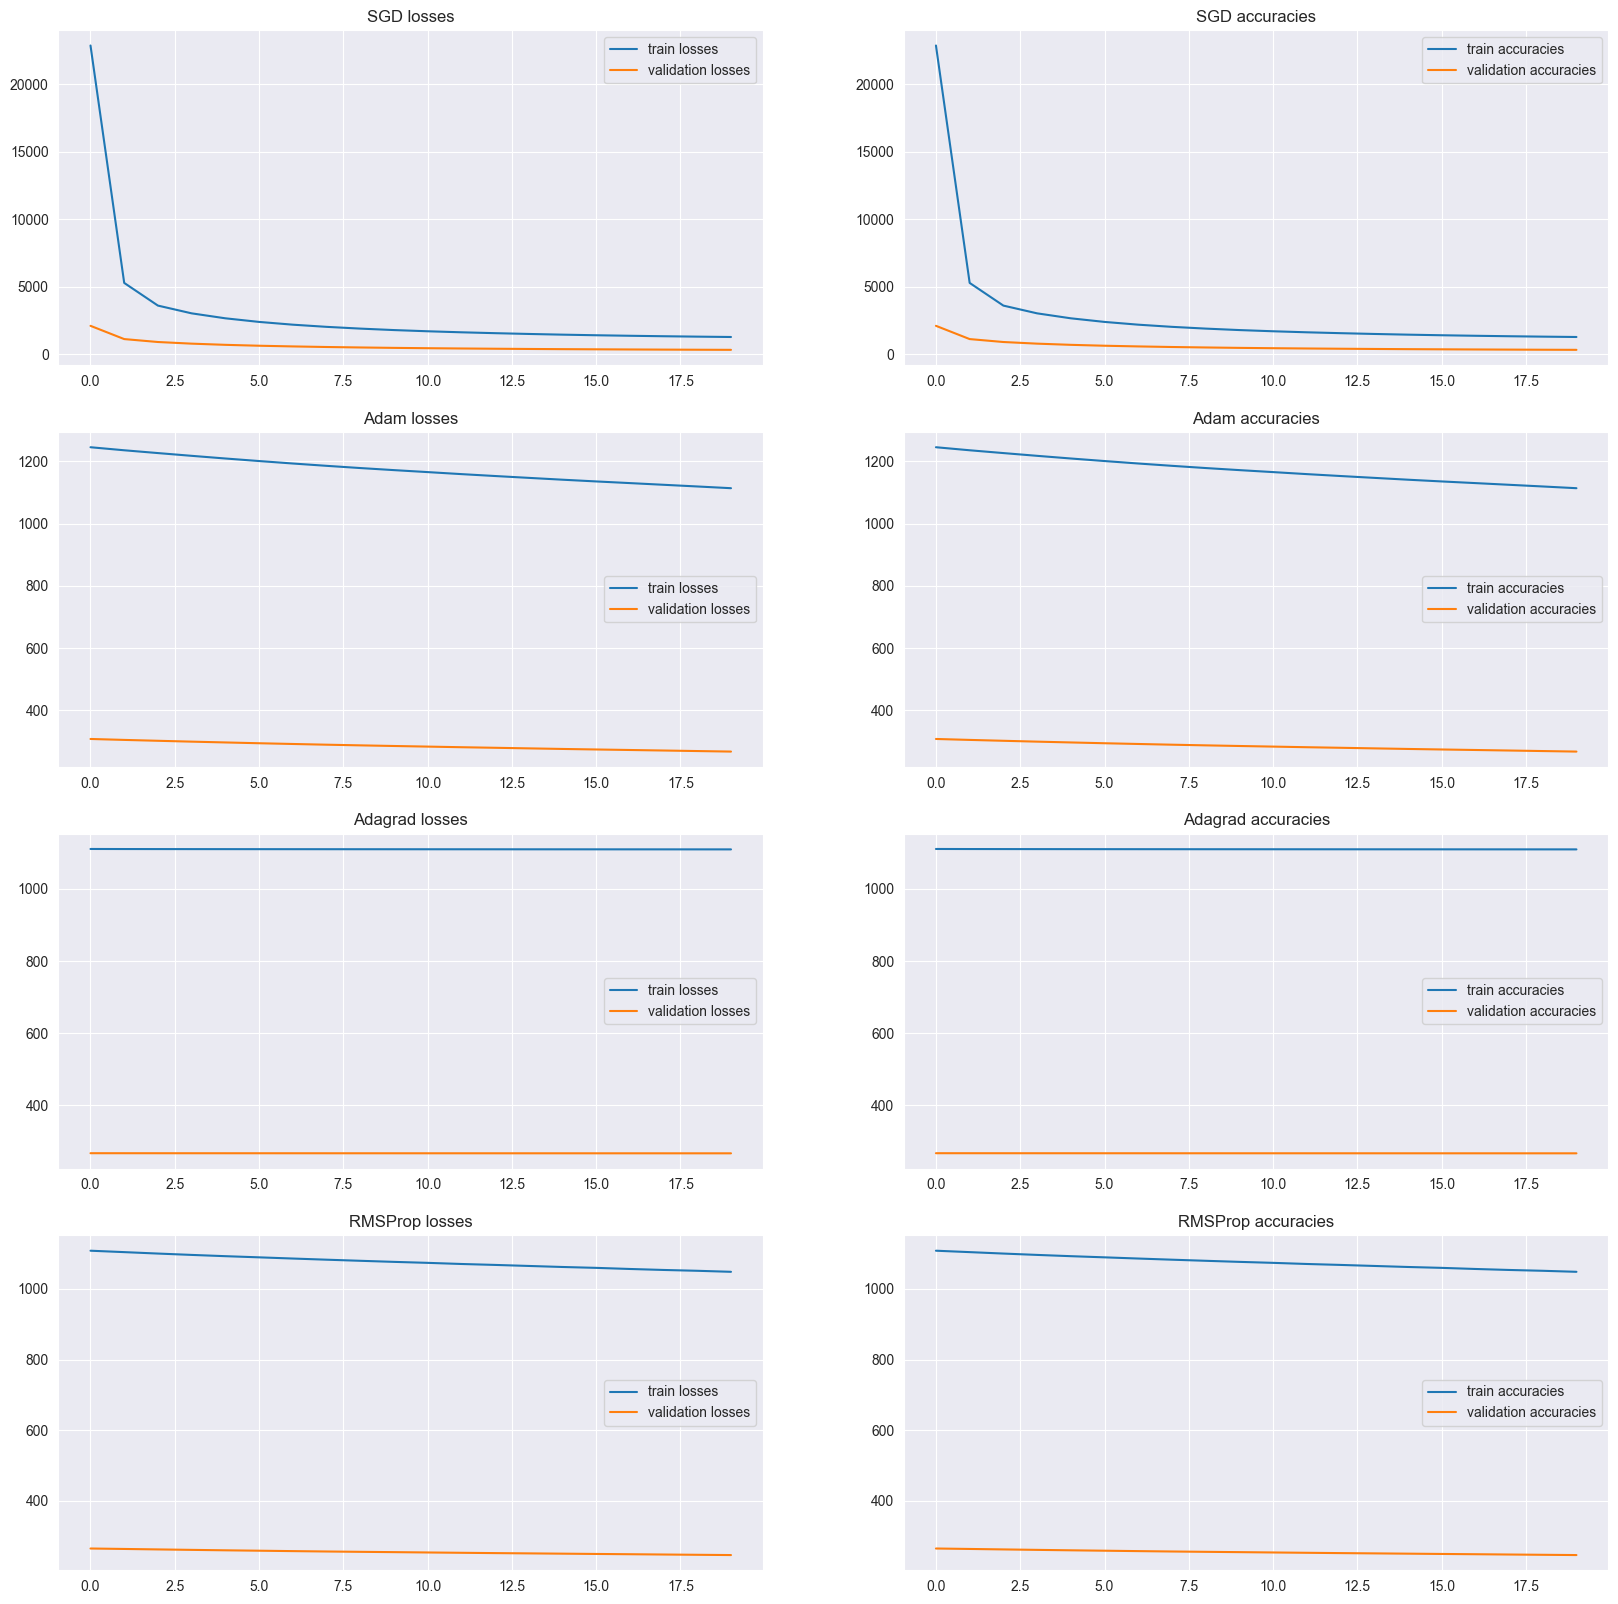

In [15]:
fig, ax = plt.subplots(len(stats_per_optimizer), 2, figsize=(20, 20))
for i, (optimizer_name, stats) in enumerate(stats_per_optimizer.items()):
    for j, key_type in enumerate(stats):
        ax[i, j].plot(stats[key_type]["train"], label=f"train {key_type}")
        ax[i, j].plot(stats[key_type]["validation"], label=f"validation {key_type}")
        ax[i, j].set_title(f"{optimizer_name} {key_type}")
        ax[i, j].legend()
plt.show()


As we can see, each optimizer has its own behavior. The SGD optimizer is the most unstable one, but it is the fastest one. The Adam optimizer is the most stable one, but it is the slowest one. The Adagrad optimizer is the most stable one, but it is the slowest one. The RMSProp optimizer is the most stable one, but it is the slowest one.
Let's try to adjust the learning rate for each optimizer and see how it will affect the training process. 

### Adam playground

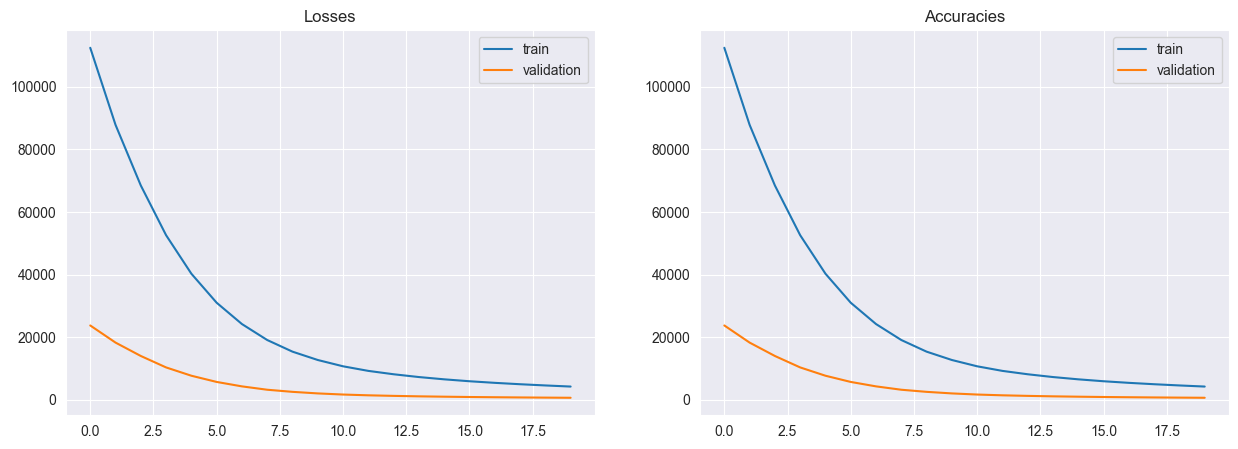

In [22]:
model = WiNET(INPUT_FEATURES, OUTPUT_FEATURES, HIDDEN_FEATURES)
optimizer = Adam(model, lr=1e-4)
adam_stats = {
    "losses": {
        "train": [],
        "validation": []
    },
    "accuracies": {
        "train": [],
        "validation": []
    }
}
train(model=model, optimizer=optimizer, loss_fn=loss_fn,
      dataloaders=(train_dl, test_dl), metric_fn=mse, epochs=epochs,
      stats=adam_stats, logger=logger, weights_dir=weights_dir,
      save_state_frequency=save_state_frequency,
      min_save_epoch=min_save_epoch)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i, type_ in enumerate(adam_stats.keys()):
    ax[i].plot(adam_stats[type_]["train"], label="train")
    ax[i].plot(adam_stats[type_]["validation"], label="validation")
    ax[i].set_title(type_.capitalize())
    ax[i].legend()
plt.show()

Let's try to play with betas for Adam optimizer and see how it will affect the training process.

100%|██████████| 20/20 [00:06<00:00,  3.23it/s]


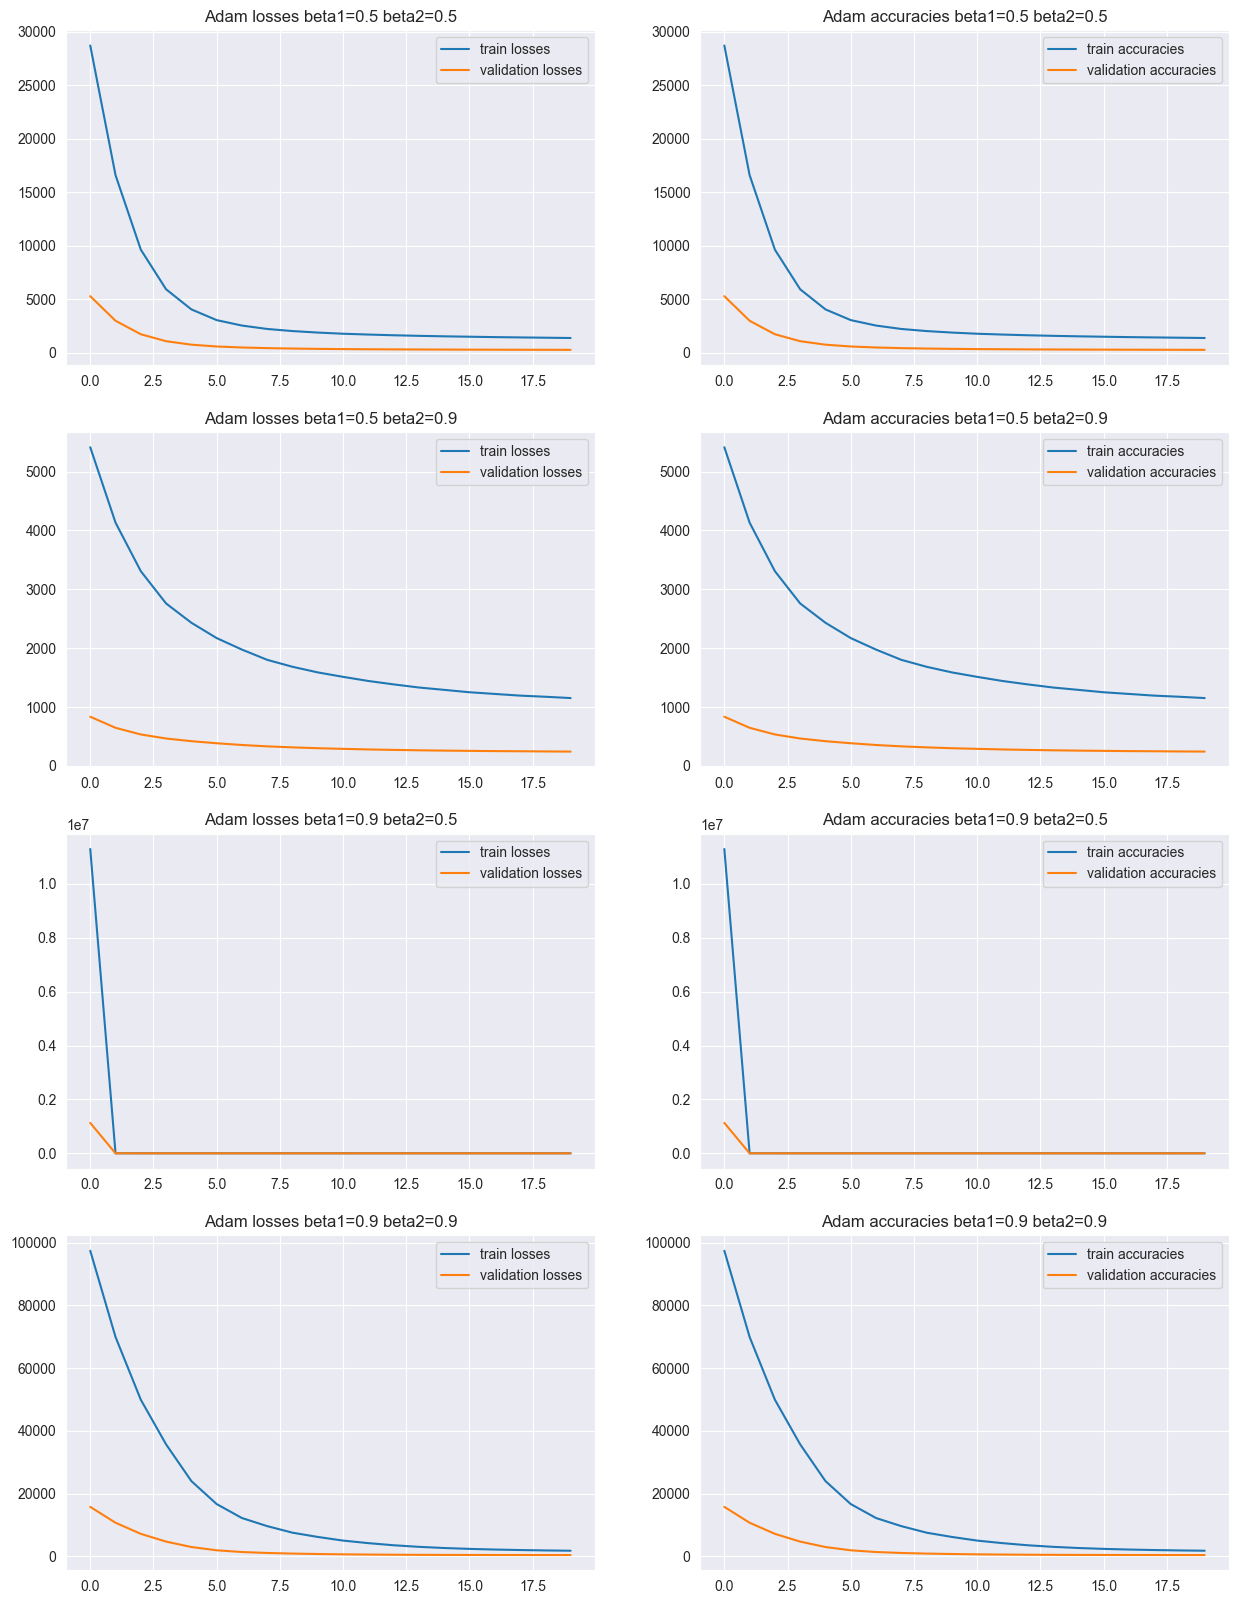

In [28]:
betas = [(0.5, 0.5), (0.5, 0.9), (0.9, 0.5), (0.9, 0.9)]
adam_stats = {betas[i]: {
    "losses": {"train": [], "validation": []},
    "accuracies": {"train": [], "validation": []}} for i in range(len(betas))}
for beta_tuple in adam_stats.keys():
    model = WiNET(INPUT_FEATURES, OUTPUT_FEATURES, HIDDEN_FEATURES)
    optimizer = Adam(model, lr=1e-4, beta1=beta_tuple[0], beta2=beta_tuple[1])
    train(model=model, optimizer=optimizer, loss_fn=loss_fn,
          dataloaders=(train_dl, test_dl), metric_fn=mse, epochs=epochs,
          stats=adam_stats[beta_tuple], logger=logger, weights_dir=weights_dir,
          save_state_frequency=save_state_frequency,
          min_save_epoch=min_save_epoch)
fig, ax = plt.subplots(len(adam_stats.keys()), 2, figsize=(15, 20))
for i, (beta_tuple, stats) in enumerate(adam_stats.items()):
    for j, key_type in enumerate(stats):
        ax[i, j].plot(stats[key_type]["train"], label=f"train {key_type}")
        ax[i, j].plot(stats[key_type]["validation"], label=f"validation {key_type}")
        ax[i, j].set_title(f"Adam {key_type} beta1={beta_tuple[0]} beta2={beta_tuple[1]}")
        ax[i, j].legend()
plt.show()

Here is some intuition behind the observed changes. Each of betas is responsive for weight importance with respect to it distribution. Thus we can control the importance of the weights and achieve better results and faster convergence. 
But we cannot achieve the same results with other datasets. So it is requires a little playground around the hyperparameters.

### Adagrad playground

100%|██████████| 20/20 [00:05<00:00,  3.88it/s]


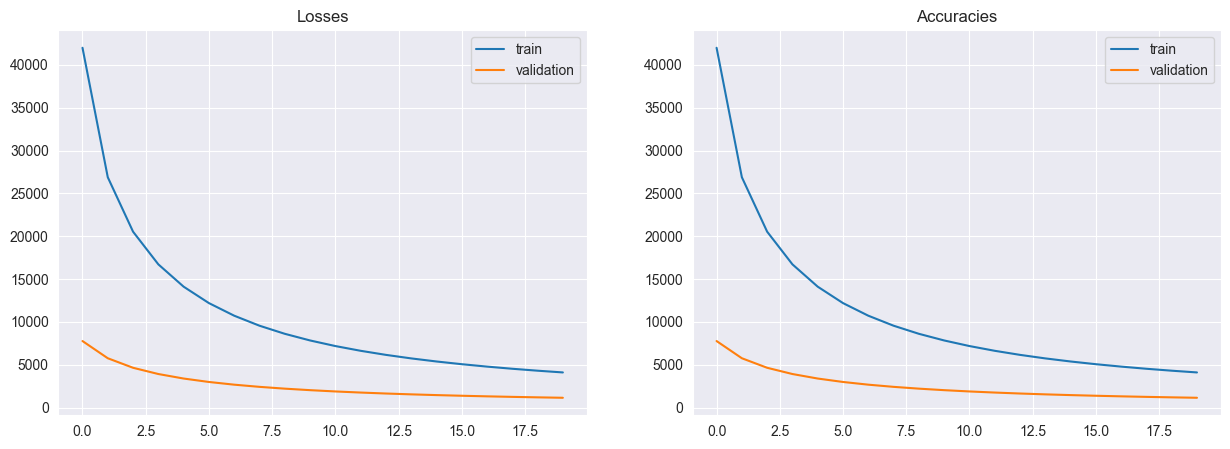

In [31]:
model = WiNET(INPUT_FEATURES, OUTPUT_FEATURES, HIDDEN_FEATURES)
optimizer = Adagrad(model, lr=5e-3)
adagrad_stats = {
    "losses": {
        "train": [],
        "validation": []
    },
    "accuracies": {
        "train": [],
        "validation": []
    }
}
train(model=model, optimizer=optimizer, loss_fn=loss_fn,
      dataloaders=(train_dl, test_dl), metric_fn=mse, epochs=epochs,
      stats=adagrad_stats, logger=logger, weights_dir=weights_dir,
      save_state_frequency=save_state_frequency,
      min_save_epoch=min_save_epoch)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i, type_ in enumerate(adagrad_stats.keys()):
    ax[i].plot(adagrad_stats[type_]["train"], label="train")
    ax[i].plot(adagrad_stats[type_]["validation"], label="validation")
    ax[i].set_title(type_.capitalize())
    ax[i].legend()
plt.show()

### RMSProp playground

100%|██████████| 20/20 [00:05<00:00,  3.77it/s]


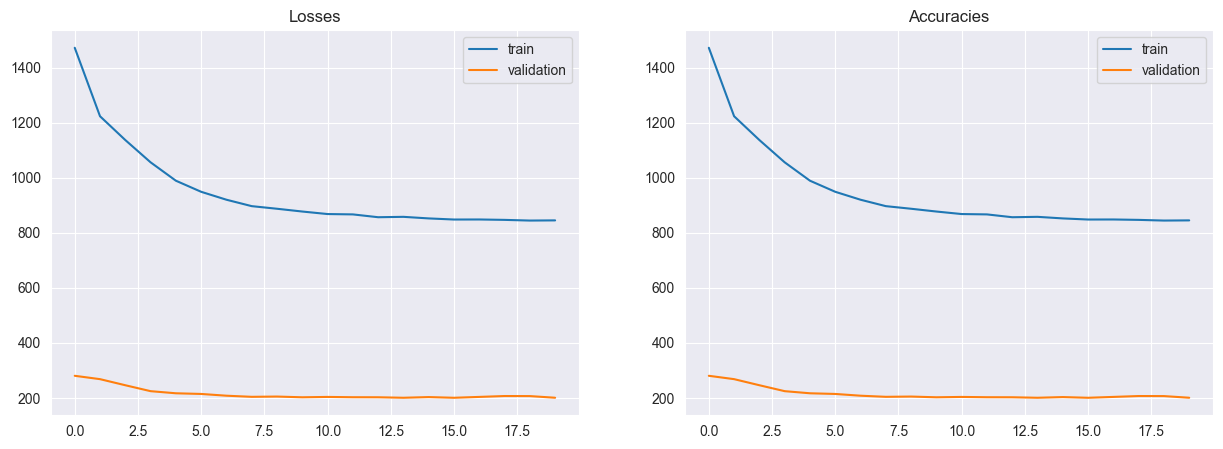

In [32]:
model = WiNET(INPUT_FEATURES, OUTPUT_FEATURES, HIDDEN_FEATURES)
optimizer = RMSProp(model, lr=1e-3)
rmsprop_stats = {
    "losses": {
        "train": [],
        "validation": []
    },
    "accuracies": {
        "train": [],
        "validation": []
    }
}
train(model=model, optimizer=optimizer, loss_fn=loss_fn,
      dataloaders=(train_dl, test_dl), metric_fn=mse, epochs=epochs,
      stats=rmsprop_stats, logger=logger, weights_dir=weights_dir,
      save_state_frequency=save_state_frequency,
      min_save_epoch=min_save_epoch)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i, type_ in enumerate(rmsprop_stats.keys()):
    ax[i].plot(rmsprop_stats[type_]["train"], label="train")
    ax[i].plot(rmsprop_stats[type_]["validation"], label="validation")
    ax[i].set_title(type_.capitalize())
    ax[i].legend()
plt.show()

100%|██████████| 20/20 [00:05<00:00,  3.80it/s]


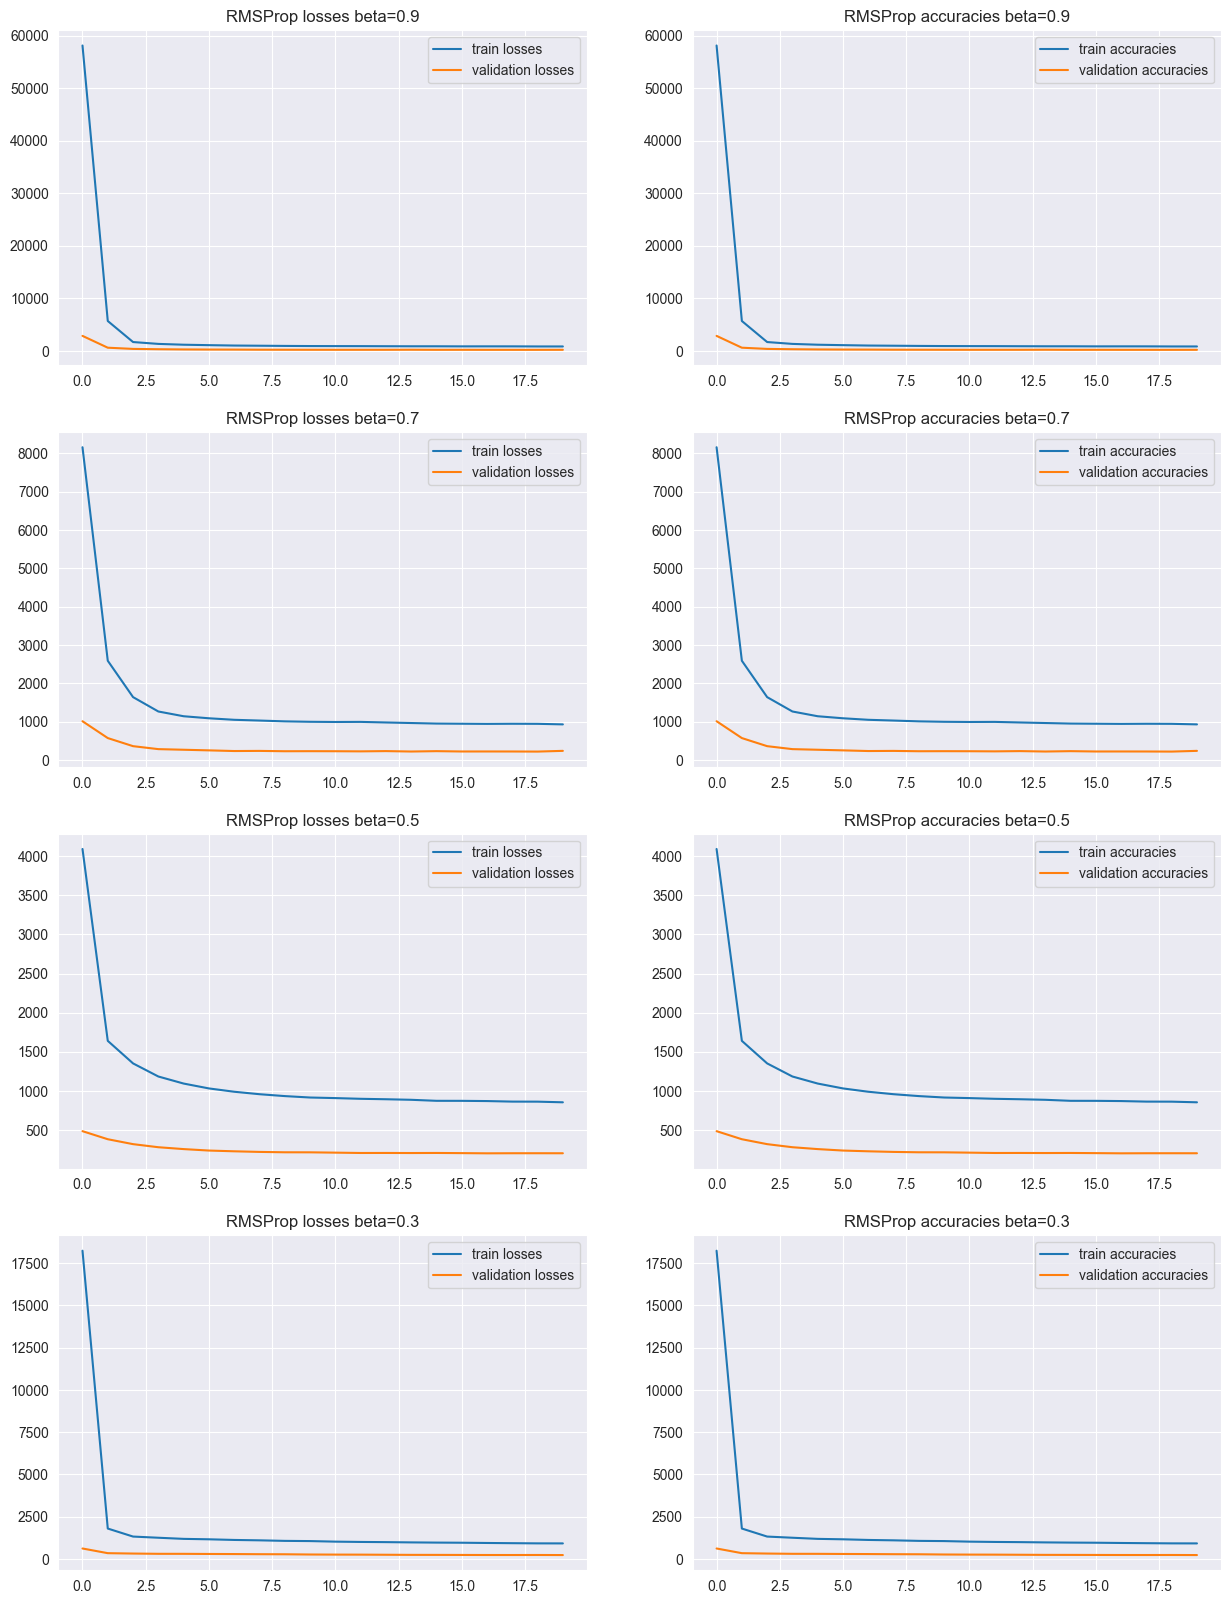

In [33]:
betas = [0.9, 0.7, 0.5, 0.3]
rmsprop_stats = {betas[i]: {
    "losses": {"train": [], "validation": []},
    "accuracies": {"train": [], "validation": []}} for i in range(len(betas))}
for beta in rmsprop_stats.keys():
    model = WiNET(INPUT_FEATURES, OUTPUT_FEATURES, HIDDEN_FEATURES)
    optimizer = RMSProp(model, lr=1e-3, beta=beta)
    train(model=model, optimizer=optimizer, loss_fn=loss_fn,
          dataloaders=(train_dl, test_dl), metric_fn=mse, epochs=epochs,
          stats=rmsprop_stats[beta], logger=logger, weights_dir=weights_dir,
          save_state_frequency=save_state_frequency,
          min_save_epoch=min_save_epoch)
fig, ax = plt.subplots(len(rmsprop_stats.keys()), 2, figsize=(15, 20))
for i, (beta, stats) in enumerate(rmsprop_stats.items()):
    for j, key_type in enumerate(stats):
        ax[i, j].plot(stats[key_type]["train"], label=f"train {key_type}")
        ax[i, j].plot(stats[key_type]["validation"], label=f"validation {key_type}")
        ax[i, j].set_title(f"RMSProp {key_type} beta={beta}")
        ax[i, j].legend()
plt.show()

The intuition behind the observed changes is similar to the Adam's. The only difference is that we use only one beta parameter for weighting the gradients. The technique is called exponential moving average. It is a powerful tool for smoothing the gradients and achieving better results. 
Also it can be used not even for gradient smoothing but for weights smoothing too. This is a powerful regularization technique.

# Conclusion
In this notebook was presented the idea of how neural networks are can be trained and what is the best toolset for it. 
From my experience, each problem requires its own approach. There is no silver bullet for all problems. Nowadays approaches are using the Adam optimizer with standard parameters. But it is not always the best choice.
Speaking about a loss functions, it is also a problem dependent. For example, if you have a binary classification problem, you can use BCE loss function. But if you have a multi-class classification problem, you can use Cross-Entropy loss function.
If it is a content generation problem, your loss functions need to be aligned to the problem itself and the data you have.